# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

**Область исследования**

Бизнес-показатели развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель исследования:**

Разобраться в причинах и помочь компании выйти в плюс.
Необходимо выяснить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В нашем распоряжении имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях (файл visits_info_short.csv):
    - `User Id` — уникальный идентификатор пользователя,
    - `Region` — страна пользователя,
    - `Device` — тип устройства пользователя,
    - `Channel` — идентификатор источника перехода,
    - `Session Start` — дата и время начала сессии,
    - `Session End` — дата и время окончания сессии;

- выгрузка их покупок за этот период (файл orders_info_short.csv):
    - `User Id` — уникальный идентификатор пользователя,
    - `Event Dt` — дата и время покупки,
    - `Revenue` — сумма заказа;

- рекламные расходы (файл costs_info_short.csv):
    - `Channel` — идентификатор рекламного источника,
    - `Dt` — дата проведения рекламной кампании,
    - `Costs` — расходы на эту кампанию.

**Ход исследования**
- изучение общей информации и предобработка данных,
- исследовательский анализ данных, 
- маркетинговый анализ данных,
- оценка окупаемости рекламных расходов,
- выводы и рекомендации.


## Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Изучим данные и выполним предобработку. 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import seaborn as sns

In [2]:
# прочитаем датасеты
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'), 
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
 )
    
except:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
 )

### Получим общую информацию о каждом датасете

##### Обработаем датасет visits

In [3]:
# информация о visits
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# приведем названия столбцов к стилю snake_case
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
# проверим на пропуски и наличие дубликатов
display(visits.duplicated().sum())
display(visits.isna().sum())

0

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [6]:
# приведем столбцы session_start, session_end к типу данных datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Промежуточный вывод:**
- в датасете имеются 309901 строка;
- явные дубликаты и пропуски отсутствуют;
- названия столбцов приведены к стилю *snake_case*; 
- тип данных столбцов *session_start, session_end* изменен на *datetime64*

##### Обработаем датасет orders

In [7]:
# информация о orders
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
# приведем названия столбцов к стилю snake_case
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
# проверим на пропуски и наличие дубликатов
display(orders.duplicated().sum())
display(orders.isna().sum())

0

user_id     0
event_dt    0
revenue     0
dtype: int64

In [10]:
# приведем столбец event_dt к типу данных datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Промежуточный вывод:**
- в датасете имеются 40212 строк;
- явные дубликаты и пропуски отсутствуют;
- названия столбцов приведены к стилю *snake_case*; 
- тип данных столбца *event_dt* изменен на *datetime64*.

##### Обработаем датасет costs

In [11]:
# информация о costs
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
# приведем названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [13]:
# проверим на пропуски и наличие дубликатов
display(costs.duplicated().sum())
display(costs.isna().sum())

0

dt         0
channel    0
costs      0
dtype: int64

In [14]:
# приведем столбец dt к нужному типу данных 
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Промежуточный вывод:**
- в датасете имеются 1800 строк;
- явные дубликаты и пропуски отсутствуют;
- названия столбцов приведены к нижнему регистру; 
- тип данных столбца *dt* изменен.

**Вывод по разделу:**
- сделана обработка всех датасетов:
    - названия столбцов приведены к единому стилю;
    - изменен тип данных, где необходимо;
    - пропуски и дубликаты не обнаружены.
    
Можем приступать к дальнейшей работе.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Зададим функцию для вычисления профилей пользователей

In [15]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[ns]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Зададим функцию для расчета удержания - Retention Rate

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Зададим функцию для расчета конверсии 

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Зададим функцию для расчета LTV и ROI

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


### Зададим функции для построения графиков


In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(18, 9))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


## Исследовательский анализ данных

- Составим профили пользователей. Определии минимальную и максимальную даты привлечения пользователей.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [23]:
# проверяем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [24]:
# определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей', profiles['dt'].min())
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Даты совпадают с техническим заданием, можем двигаться дальше.

### Анализ пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:
# составим таблицу
region = (
    profiles.groupby('region')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)

region['region%'] = region['user_id'] / region['user_id'].sum()
region['payers%'] = region['payer'] / region['user_id']

display(region.sort_values(by='user_id', ascending=False)
    .style.format({'payers%': '{:.2%}', 'region%': '{:.2%}'}))

,region,user_id,payer,region%,payers%
3,United States,100002,6902,66.66%,6.90%
2,UK,17575,700,11.72%,3.98%
0,France,17450,663,11.63%,3.80%
1,Germany,14981,616,9.99%,4.11%


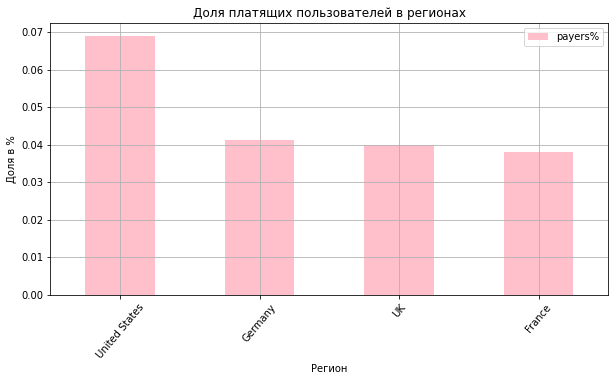

In [26]:
# построим столбчатую диаграмму для доли платящих пользователей в рамках региона

region.sort_values(by='payers%', ascending=False).plot.bar(
    x='region', y=['payers%'], grid=True, 
    title='Доля платящих пользователей в регионах', 
    color='pink', rot=50, figsize=(10, 5)
).set(xlabel='Регион', ylabel='Доля в %');

**Больше всего пользователей, в том числе и платящих, находятся в США. Наименьшее число как платящих, так и пользующихся услугами бесплатно - в Германии.**

### Анализ устройств пользователей

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [27]:
# сгруппируем данные по устройствам
device = (
    profiles.groupby('device')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
device['payers%'] = round(device['payer'] / device['user_id'] * 100, 2)
device.sort_values(by='user_id', ascending=False)

,device,user_id,payer,payers%
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
2,PC,30455,1537,5.05
1,Mac,30042,1912,6.36


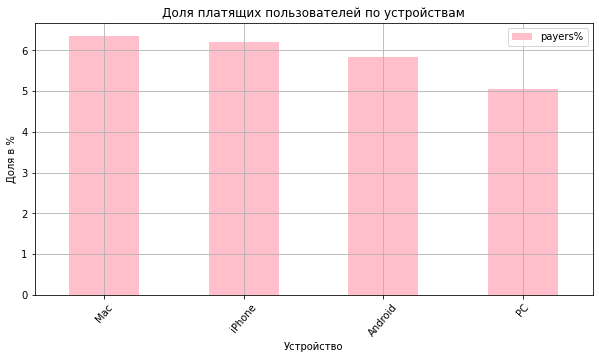

In [28]:
# построим столбчатую диаграмму для доли платящих пользователей в рамках региона
device.sort_values(by='payers%', ascending=False).plot.bar(
    x='device', y=['payers%'], grid=True,
    title='Доля платящих пользователей по устройствам',
    color='pink', rot=50, figsize=(10, 5)
).set(xlabel='Устройство', ylabel='Доля в %')
plt.show()

**Наши клиенты пользуются приложением на iPhone, устройствах на базе операционной системы Android, ПК и устройства с macOS. По общему числу пользователей, а также по числу платящих пользователей, iPhone занимает лидирующее положение. Доля платящих пользователей является самой высокой у устройств на базе macOS, в то время как iPhone занимает второе место в этом показателе.**


### Анализ источников привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
channel = (
    profiles.groupby('channel')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
# % пользователей каждого канала 
channel['users%'] = round(channel['user_id'] / channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
channel['payers%'] = round(channel['payer'] / channel['user_id'] * 100, 2)

channel.sort_values(by='payers%', ascending=False)

,channel,user_id,payer,users%,payers%
1,FaceBoom,29144,3557,19.43,12.20
0,AdNonSense,3880,440,2.59,11.34
9,lambdaMediaAds,2149,225,1.43,10.47
6,TipTop,19561,1878,13.04,9.60
5,RocketSuperAds,4448,352,2.97,7.91
7,WahooNetBanner,8553,453,5.70,5.30
8,YRabbit,4312,165,2.87,3.83
3,MediaTornado,4364,156,2.91,3.57
2,LeapBob,8553,262,5.70,3.06
4,OppleCreativeMedia,8605,233,5.74,2.71


Построим два графика: 
- с общим количеством пользователей в рамках канала привлечения,
- с долей платящих пользователей в рамках канала привлечения.

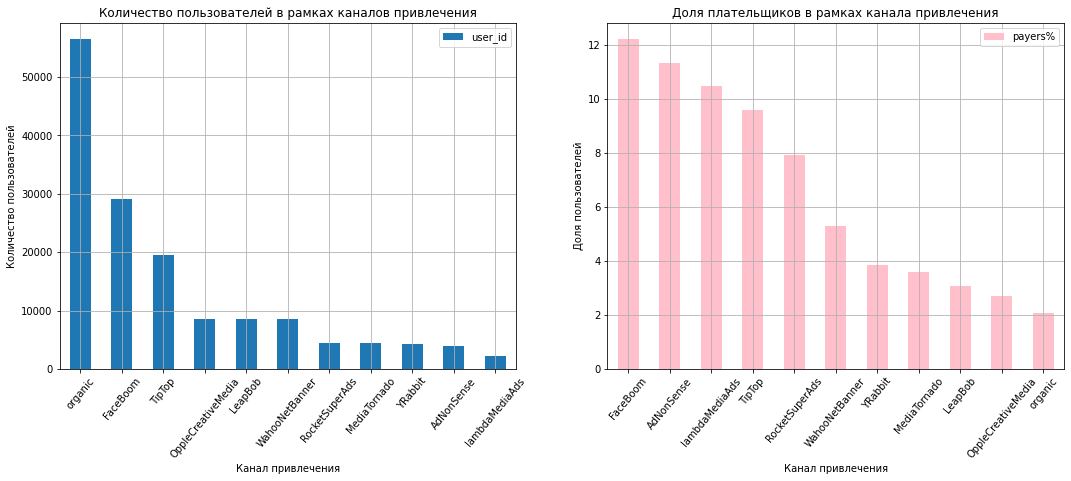

In [30]:
plt.figure(figsize=(18, 14))

ax1 = plt.subplot(2, 2, 1)
channel.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='channel', y=['user_id'],grid=True,
                                                           title='Количество пользователей в рамках каналов привлечения', 
                                                           rot=50, ax=ax1).set(xlabel='Канал привлечения', 
                                                                               ylabel='Количество пользователей')
ax2 = plt.subplot(2, 2, 2)
channel.sort_values(by='payers%', ascending=False).plot.bar(
                                                             x='channel', y=['payers%'], grid=True,
                                                             title='Доля плательщиков в рамках канала привлечения',
                                                             rot=50, color='pink', ax=ax2).set(xlabel='Канал привлечения', 
                                                                               ylabel='Доля пользователей')
plt.show()

**Большинство пользователей пришли органически, то есть без использования рекламных ссылок на различных платформах. Наибольшее количество пользователей привлекли две платформы: FaceBoom и TipTop, у которых также высокие показатели платящих пользователей. Следует обратить внимание на канал AdNonSense, поскольку у него одни из лучших показателей доли платящих клиентов.**

**Вывод по разделу:**

1. Распределение пользователей по странам:

- Самое большое количество пользователей, как платящих, так и использующих приложение бесплатно, находится в США.
- Наименьшее число пользователей, как платящих, так и бесплатных, зарегистрировано в Германии.

2. Используемые платформы:

- Наибольшее число пользователей пользуется приложением на iPhone, устройствах на базе Android, ПК и macOS.
- iPhone занимает лидирующее положение как по общему числу пользователей, так и по числу платящих пользователей.
- Доля платящих пользователей выше всего у устройств на базе macOS, с iPhone на втором месте.

3. Источники привлечения пользователей:

- Большинство пользователей пришли органически, без использования рекламных ссылок.
- FaceBoom и TipTop - две платформы, на которых привлекается больше всего пользователей, с высокими показателями платящих клиентов.
- Канал AdNonSense стоит отметить, так как он имеет одни из лучших показателей доли платящих клиентов.

В целом, сосредоточение пользователей в США, предпочтение iPhone в использовании приложения, источники привлечения пользователей, такие как FaceBoom и TipTop, а также высокая доля платящих пользователей на устройствах macOS, представляют собой ключевые моменты для стратегии развития продукта и маркетинга.

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

### Посчитаем общую сумму расходов на рекламу

In [31]:
print('Общая сумма расходов на рекламу:',round(costs['costs'].sum(),2)) 

Общая сумма расходов на рекламу: 105497.3


### Распределение затрат по рекламным источникам

In [32]:
# находим общие затраты и доли расходов на рекламные каналы
expenses = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
expenses['cost%'] = round((expenses['costs'] / expenses['costs'].sum())*100, 2)
expenses

,costs,cost%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


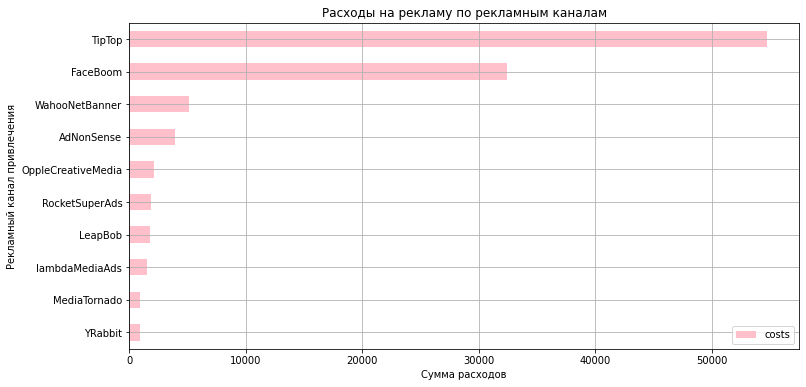

In [33]:
# строим столбчатый график
expenses.sort_values(by='costs', ascending=True).plot.barh(y='costs',
                    grid=True, figsize=(12,6), color='pink',
                    title='Расходы на рекламу по рекламным каналам',
                    ).set(ylabel='Рекламный канал привлечения', xlabel='Сумма расходов');

Таким образом, расходы распределены неравномерно между различными рекламными источниками. Наибольшая доля затрат приходится на TipTop и FaceBoom, в то время как остальные источники получают меньшую долю бюджета.

### Построим график с визуализацией динамики изменения расходов во времени 

In [34]:
# создадим cтолбцы с датой в формате месяцев и недель
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

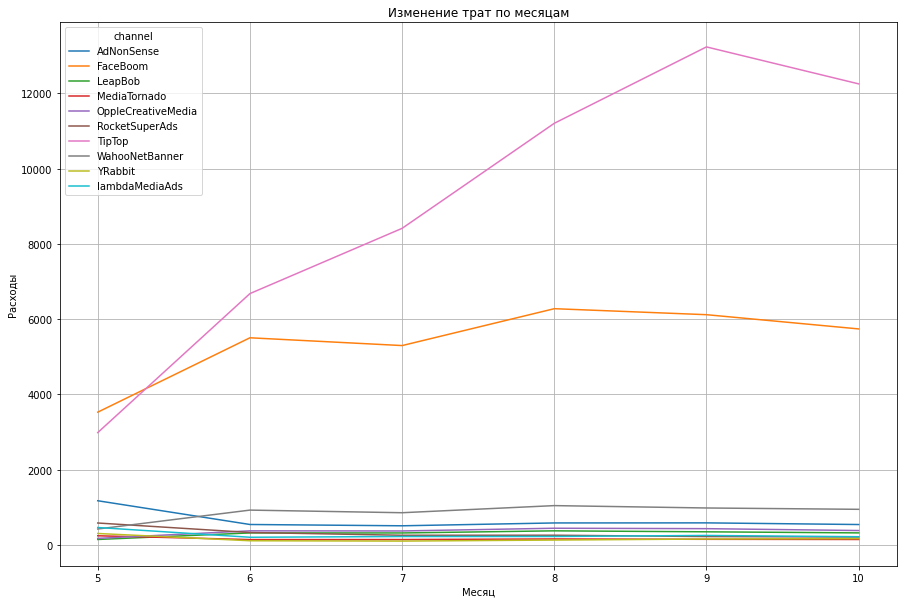

In [35]:
# построим графики распределения расходов по месяцам и неделям
costs.pivot_table(
    index='month',  # даты 
    columns='channel',  # источники 
    values='costs',  # расходы на рекламу
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

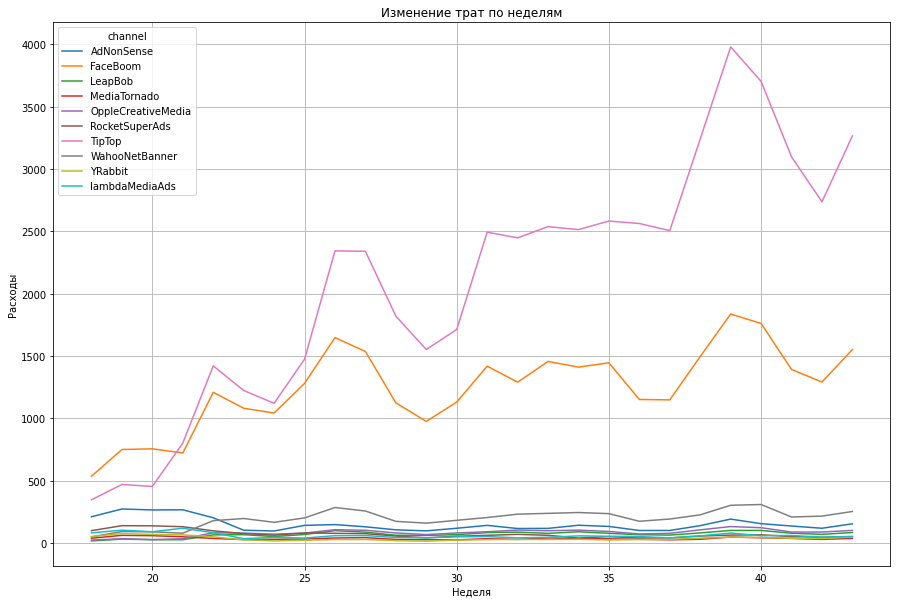

In [36]:
# графики распределения расходов по неделям
costs.pivot_table(
    index='week',  # даты 
    columns='channel',  # источники 
    values='costs',  # расходы на рекламу
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

На графиках также видно, что большая часть расходов на рекламу идёт на привлечение пользователей через каналы TipTop и FaceBoom - пик приходится на летние и осенние месяцы. Остальные каналы получили миниммальные бюджеты, траты на них практически не меняются.

###  Рассчитаем САС для одного пользователя по каждому рекламному источнику

In [37]:
cac_user = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_user

acquisition_cost    1.127481
dtype: float64

In [38]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


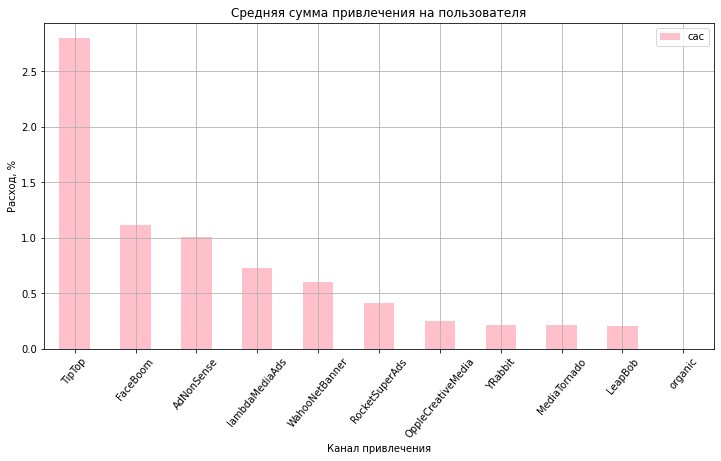

In [39]:
# построим график
cac_channel.plot.bar(grid=True, rot=50, figsize=(12,6), color='pink',
                     title='Средняя сумма привлечения на пользователя').set(
    xlabel="Канал привлечения", ylabel='Расход, %');

Самый "дорогой" пользователь - пользователь, привлеченный через канал TipTop.

**Вывод по исследованию маркетинга**
- Общая сумма расходов на рекламу более 100 тыс.
- Расходы на два рекламных канала(TipTop, FaceBoom) выросли в несколько раз.
- Средняя стоимость привлечения одного клиента у TipTop довольно высока и первышает FaceBoom более чем в два раза - необходимо проверить окупаемость рекламы.

## Оценка окупаемости рекламы

Проанализируем окупаемость рекламы, используя графики LTV, ROI и CAC. Берем в расчет, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения, а также удержание пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Нас интересует следующее:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?



### Проанализируем окупаемость рекламы c помощью графиков LTV, ROI и CAC

In [40]:
# момент анализа
observation_date = datetime(2019, 11, 1).date() 
# горизонт анализа
horizon = 14 

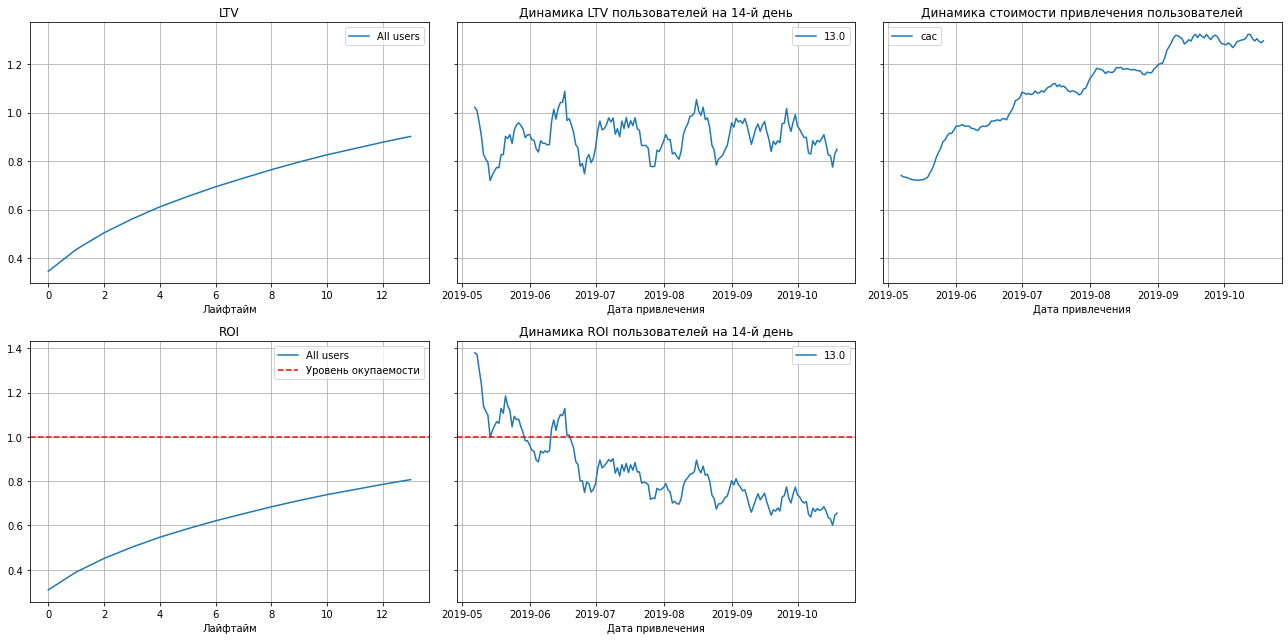

In [41]:
# отделим органических пользователей
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

Что заметно на графиках:

**LTV**:
- В период с мая по август отмечен рост количества пользователей.
- В сентябре и октябре происходит уменьшение числа пользователей.
- Несмотря на это, общий тренд LTV указывает на его стабильное увеличение, хотя к концу второй недели рекламные затраты не окупаются.

**Динамика стоимости привлечения пользователей**:
- Стоимость привлечения клиентов возрастает с мая по август.
- В сентябре и октябре эта стоимость остается без изменений.
- Общая тенденция показывает постоянный рост стоимости привлечения клиентов, в то же время рентабельность инвестиций (ROI) начинает снижаться начиная с июня.

**Динамика ROI**: 
- ROI для пользователей снижается в течение месяцев с мая по август.
- В сентябре и октябре наблюдается улучшение показателей ROI.

В общем, за период с мая по август 2019 года прослеживается отрицательная динамика по LTV и ROI пользователей, при этом затраты на привлечение клиентов продолжают расти. Однако в последующие месяцы ситуация улучшается, хотя и сохраняется определенная нестабильность.

### Анализ конверсии и удержания пользователей. 

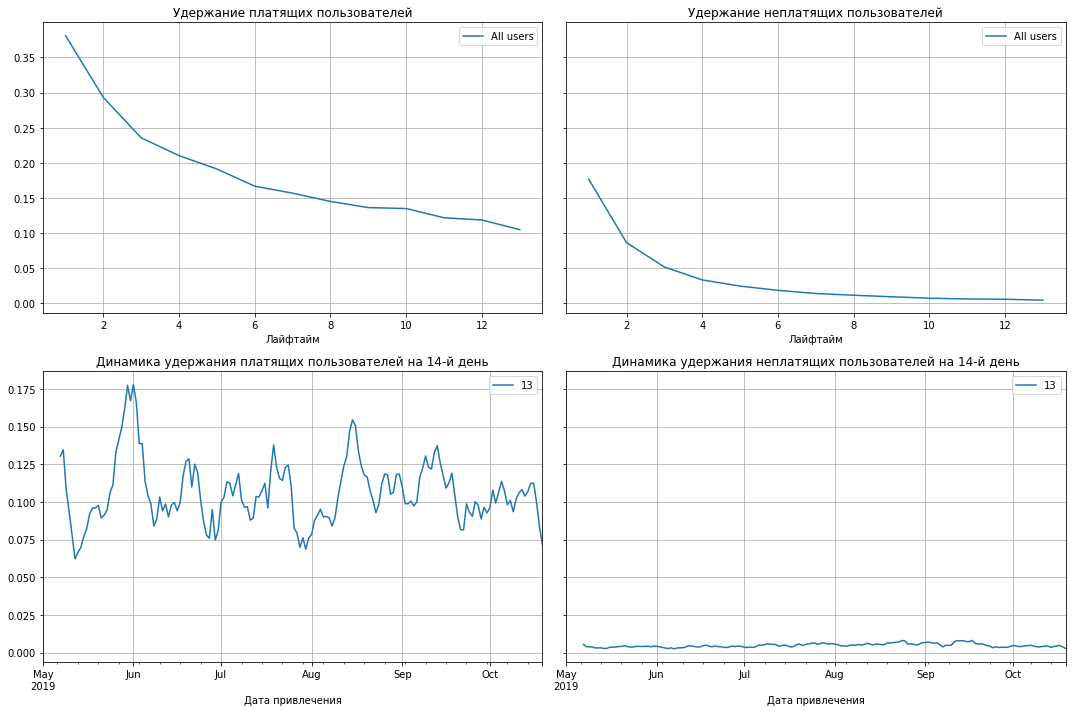

In [42]:
# построим график удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles,
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon)
# построим графики для платящих и неплатящих пользователей
plot_retention(retention_grouped, retention_history, horizon) 

**Выводы по удержанию пользователей**

**Удержание платящих пользователей**

Показатели удержания платящих пользователей демонстрируют относительную стабильность, варьируясь в пределах 0.30-0.35. Это свидетельствует о том, что стратегии удержания платящих пользователей были достаточно эффективными, обеспечивая постоянный уровень удержания в течение изучаемого периода.

**Удержание неплатящих пользователей**

В то же время, удержание неплатящих пользователей показывает убывающую тенденцию, снижаясь с примерно 0.20 до менее 0.15. Это подчеркивает проблемы с удержанием этой категории пользователей и заметное падение их удержания со временем.

С учетом всех категорий пользователей, уровни удержания колеблются между показателями платящих и неплатящих пользователей, обычно находясь в диапазоне 0.25-0.30. Это указывает на умеренную успешность общих усилий по удержанию, хотя и выявляет потенциал для улучшения, особенно в части удержания неплатящих пользователей.

**Динамика Лайфтайма**

Изучение динамики Лайфтайма удержания показывает, что платящие пользователи, как правило, имеют более высокие и стабильные показатели удержания по сравнению с неплатящими пользователями, у которых наблюдается более значительное снижение.

**Динамика удержания на 14-й день**

Анализ 14-дневной динамики удержания выявил значительную разницу между платящими и неплатящими пользователями. Платящие пользователи показывают значительно более высокий уровень удержания, что подчеркивает важность раннего вовлечения в стратегии удержания платящих клиентов.

Несмотря на умеренный успех в удержании платящих пользователей с относительно стабильными показателями, существуют значительные проблемы в удержании неплатящих пользователей, как это видно из снижения их уровней удержания. В целом, существует необходимость в усовершенствовании стратегий удержания, в особенности в аспектах привлечения и удержания неплатящих пользователей.

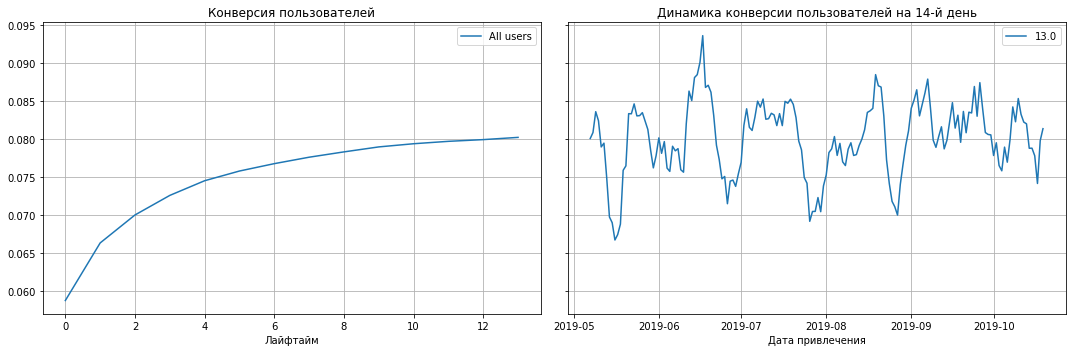

In [43]:
# построим графики конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon)
plot_conversion(conversion_grouped, conversion_history, horizon)

Изначально высокий уровень конверсии пользователей на 14-й день, равный приблизительно 0.095, со временем снизился до 0.060 за шесть месяцев, после чего показатель стабилизировался в пределах 0.060-0.070. Это может отражать успешность начальных маркетинговых усилий и одновременно подчеркивать важность непрерывного совершенствования взаимодействия с пользователем и внедрения новых инициатив для поддержания лояльности клиентов.

### Анализ окупаемости рекламы с разбивкой по устройствам.

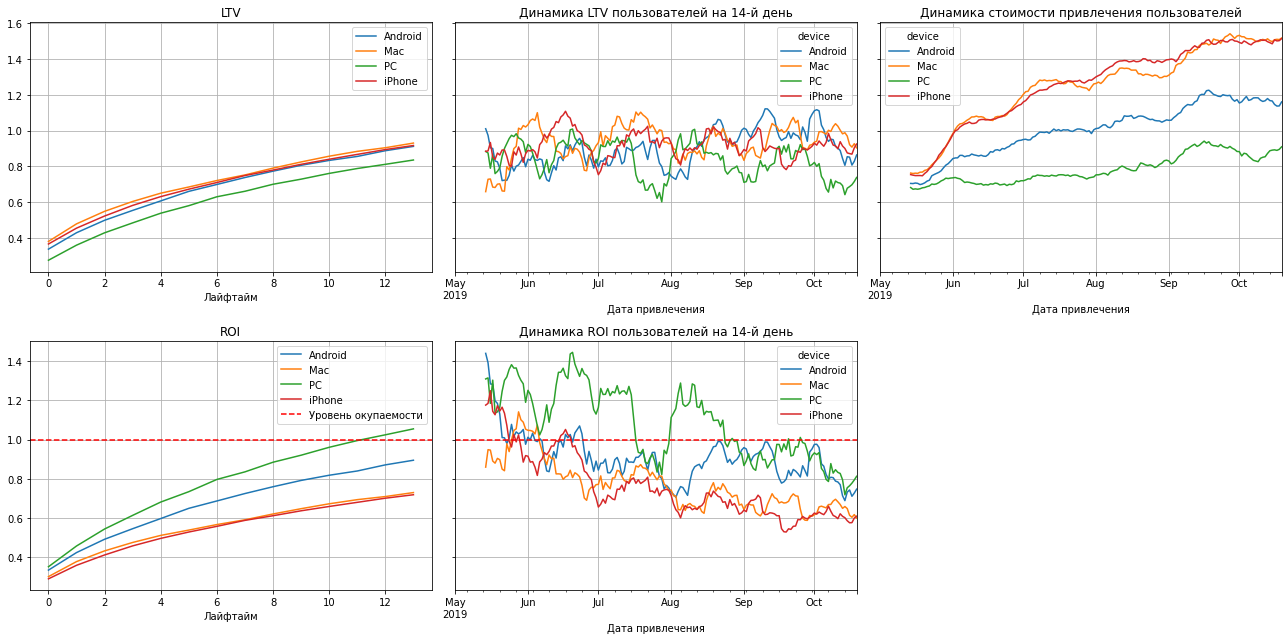

In [44]:
# построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14) 

До июня пользователи всех типов устройств демонстрировали положительную окупаемость (ROI), однако после этого произошел спад, особенно заметный среди пользователей Mac и iPhone. К сентябрю, а также в течение некоторого времени в августе, 14-дневный ROI пользователей PC балансировал на грани безубыточности, в то время как ROI пользователей других устройств оставался ниже порога окупаемости с июня. Жизненный цикл стоимости (LTV) пользователей сохранял свою сезонность, но оставался стабильным. При этом стоимость привлечения пользователей PC была самой низкой, в то время как их ROI оставался выше, чем у пользователей других устройств. В общем, за анализируемый период стоимость привлечения пользователей всех устройств показала тенденцию к росту.

Особое внимание следует уделить пользователям Mac и iPhone: несмотря на высокую и увеличивающуюся стоимость привлечения, их окупаемость оставляет желать лучшего. 

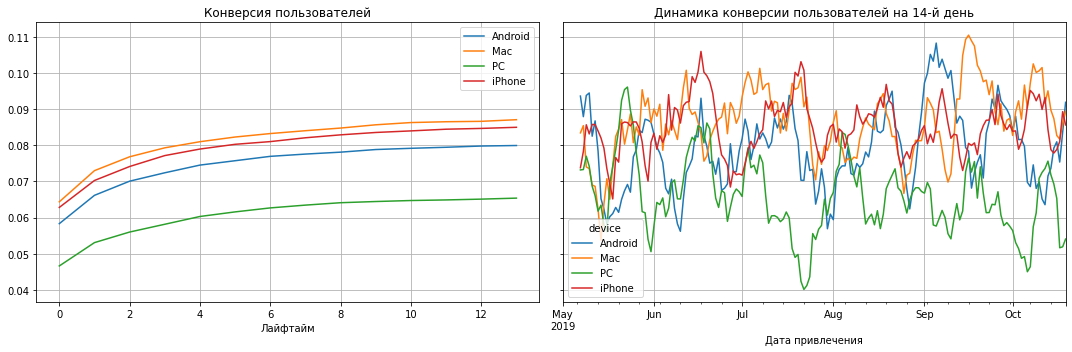

In [45]:
# конверсия с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon, 
                                                                        dimensions=['device'])
# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon)

Mac и iPhone показывают себя лучше остальных устройств, пользователи PC привлекаются не так активно. Снижение конверсии со временем может указывать на то, что пользователи теряют интерес или не находят долгосрочную ценность в продукте/услуге.

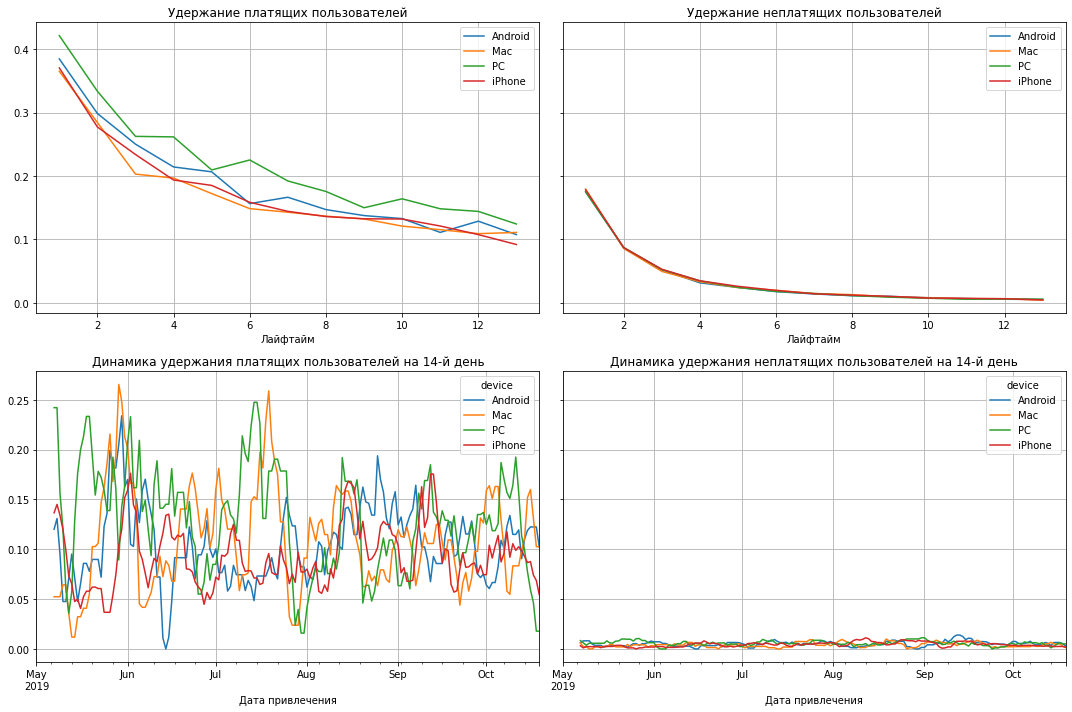

In [46]:
# посмотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon, 
                                                                    dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon)

Удержание пользователей в зависимости от устройств, в целом, не отличаются друг от друга. Пользователи PC удерживаются чуть лучше.

### Анализ окупаемости рекламы с разбивкой по странам.

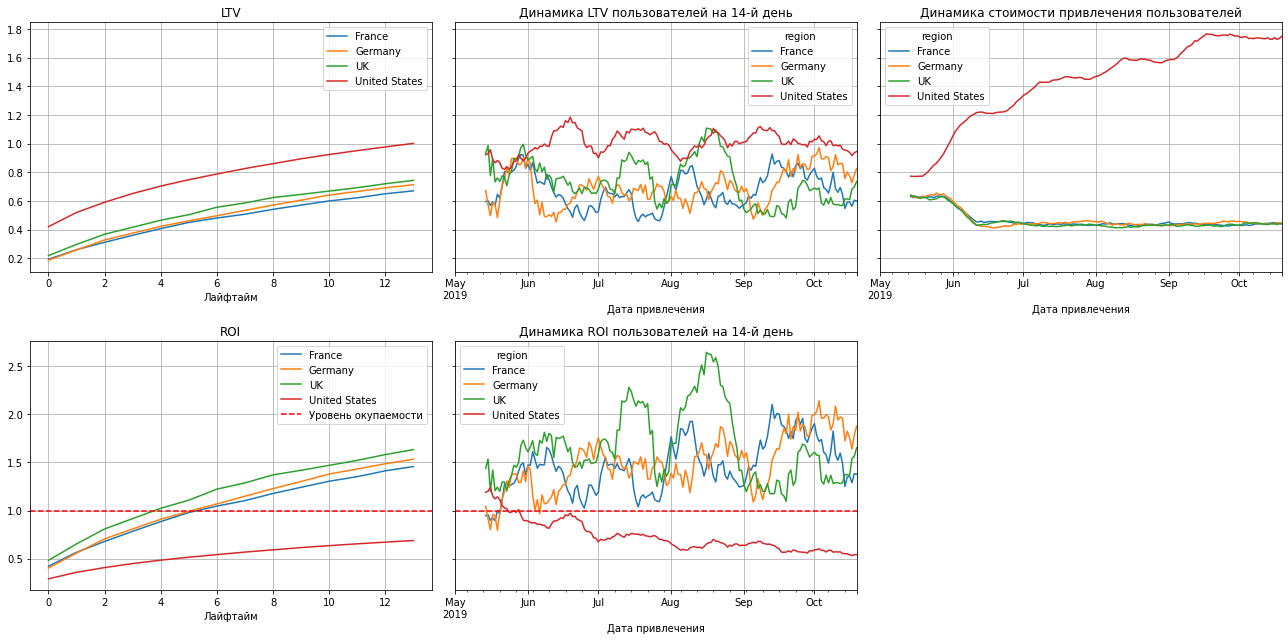

In [47]:
# построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon,
                                                                      dimensions=['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14) 

Хотя затраты на рекламу в США были самыми высокими, она не окупилась. Но LTV в США выше, чем в других странах. В Европе с окупаемостью все в порядке - положительная динамика ROI во всех трех регионах свидетельствует о том, что инвестиции в привлечение пользователей приносят прибыль и являются оправданными.

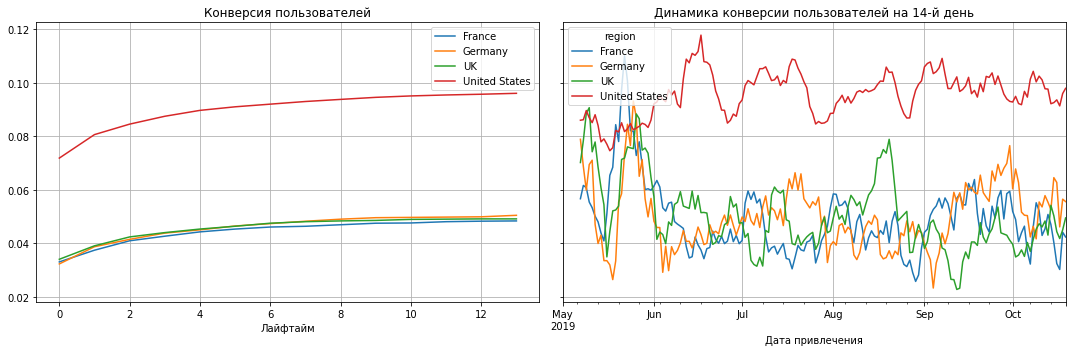

In [48]:
# конверсия с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon, 
                                                                        dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon)

Конверсия пользователей США выше конверсии пользователей других стран. Это может указывать на более эффективные маркетинговые стратегии или более высокую вовлеченность пользователей в этом регионе.

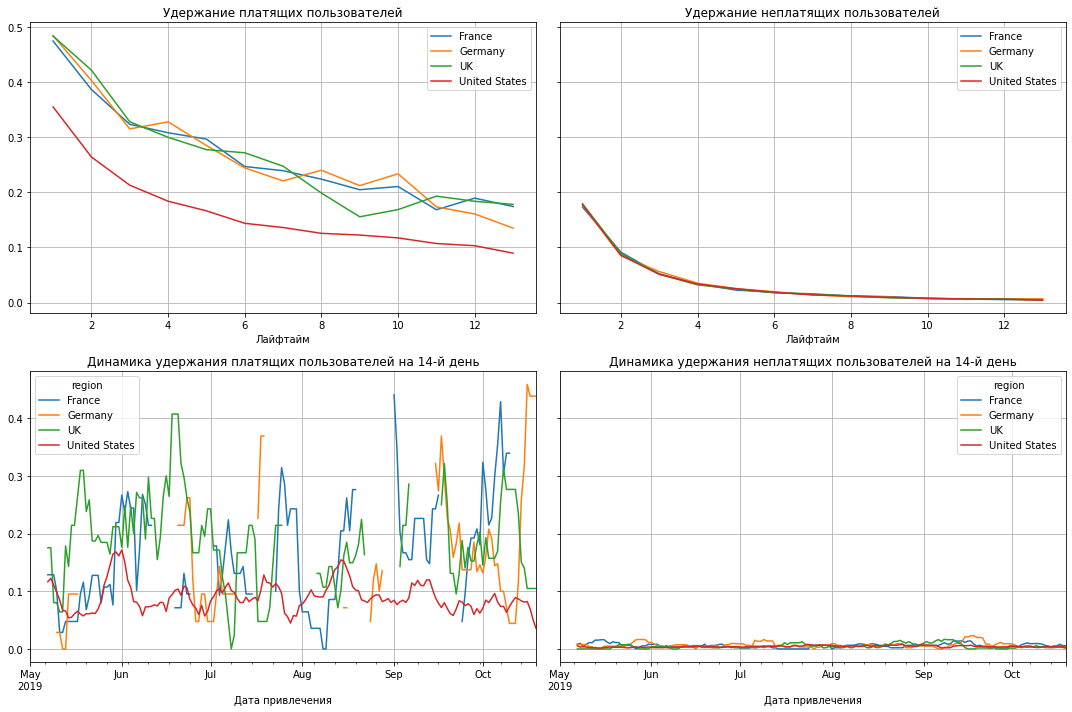

In [49]:
# посмотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon, 
                                                                    dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon)

- Наблюдается отрицательная динамика удержания платящих пользователей во всех регионах.
Самый низкий показатель удержания зафиксирован в Соединенных Штатах.
- Удержание неплатящих пользователей остается относительно стабильным, но показатели ниже, чем у платящих пользователей.
Возможно, это связано с тем, что неплатящие пользователи менее вовлечены и легче переходят к другим продуктам. 
- Динамика удержания на 14-й день показывает, что удержание пользователей снижается после двух недель использования продукта, что является обычным явлением для многих сервисов.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам. 

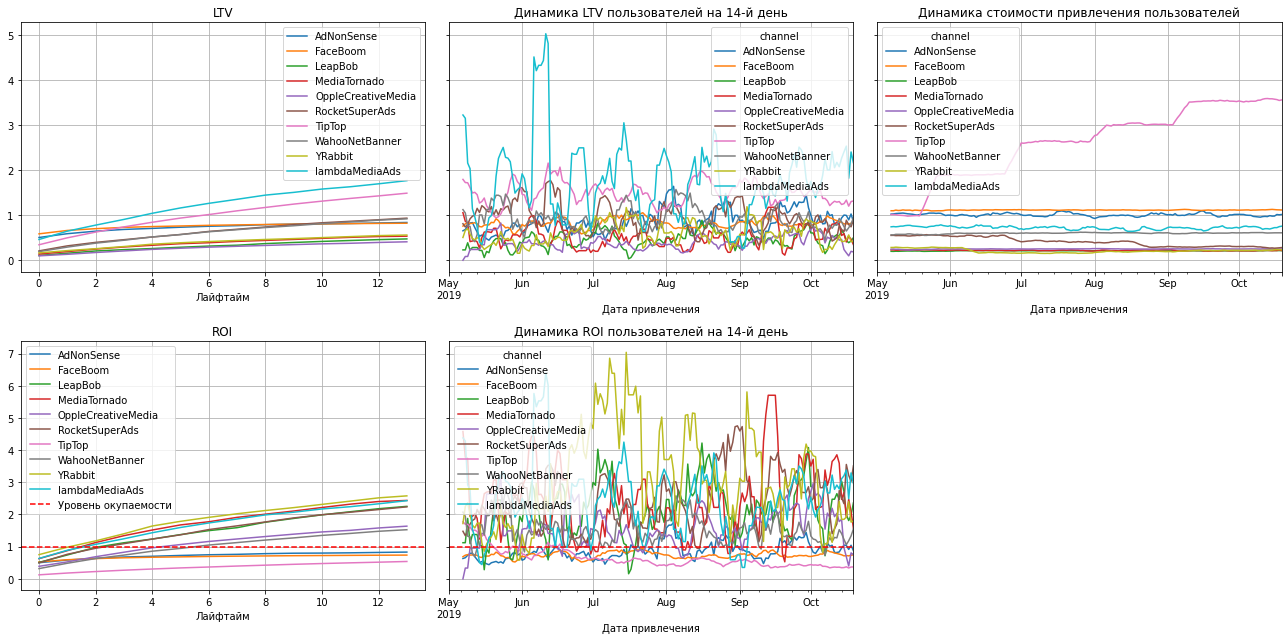

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

Исходя из графиков можно сделать следующие выводы:

1. Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop. Но эти расходы не привели к окупаемости. У остальных динамика стабильная.

2. ROI - из 10 каналов только 3 находятся ниже уровня окупаемости: TipTop, FaceBoom, AdNonSense. Самыми выгодными каналами привлечения пользователей являются - YRabbit, MediaTornado, LambdaMediaAds, LeapBob, RocketSuperAds.


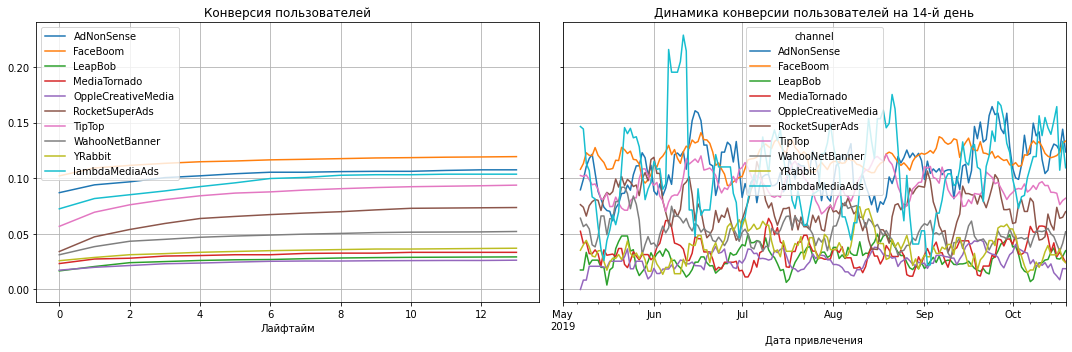

In [51]:
# посмотрим конверсию с разбивкой по каналам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon, 
                                                                        dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon)

Пользователи, привлеченные через FaceBoom, демонстрируют самую высокую конверсию. Однако, если рассматривать двухнедельный жизненный цикл в целом, то динамика конверсии среди всех пользователей практически отсутствует.

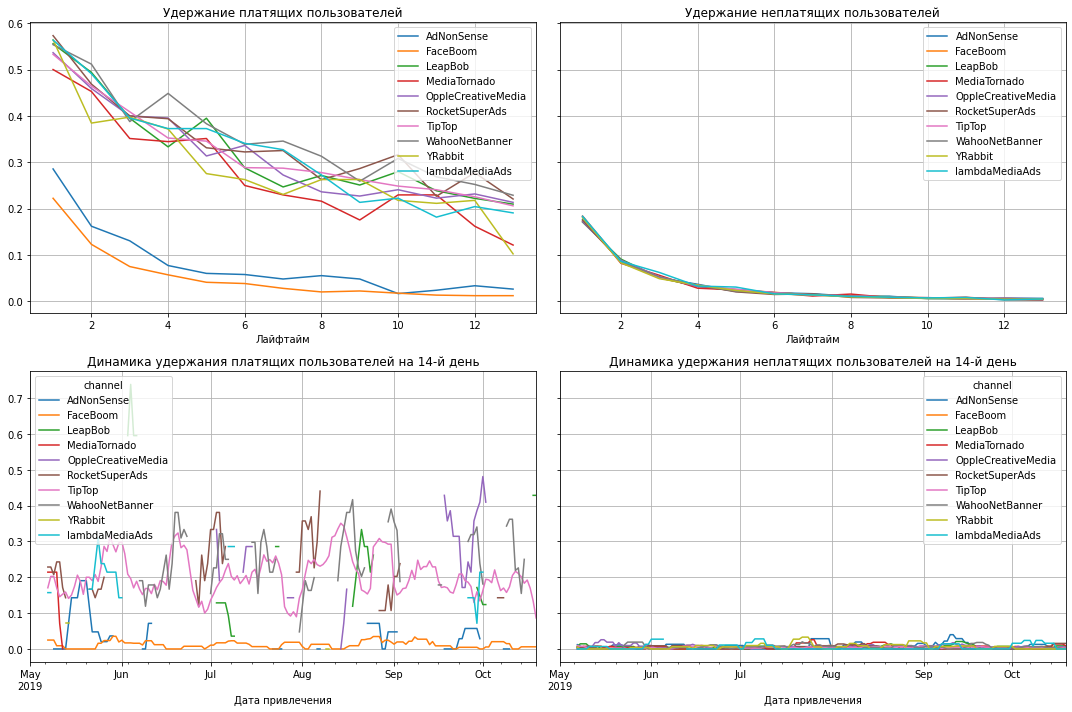

In [52]:
# посмотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon)

**Каналы AdNonSense и FaceBoom показывают худшие результаты по удержанию платящих пользователей, особенно на 14-й день после привлечения.**

Остальные каналы имеют схожие результаты.

#### Рассмотрим отдельно пользователей из США

Посмотрим на графики в разрезе рекламных каналов и устройств пользователей.

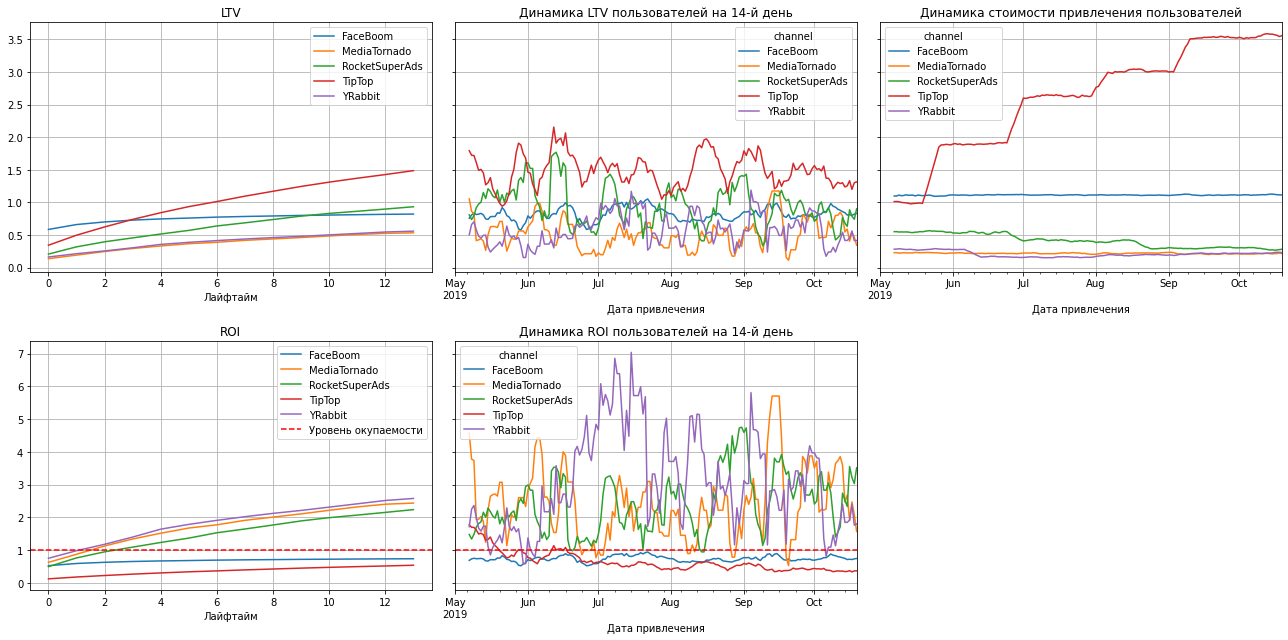

In [53]:
#создадим срез, отделив Америку от остальных стран
usa_profiles = profiles.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(usa_profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions=['channel'])
# построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

Стоимость привлечения пользователей через TipTop значительно выше, чем у других каналов, но расходы на рекламу не окупились. Стоит также отметить, что все используемые каналы кроме Tip Top и FaceBoom окупились, соответственно проблема именно в этих двух каналах.

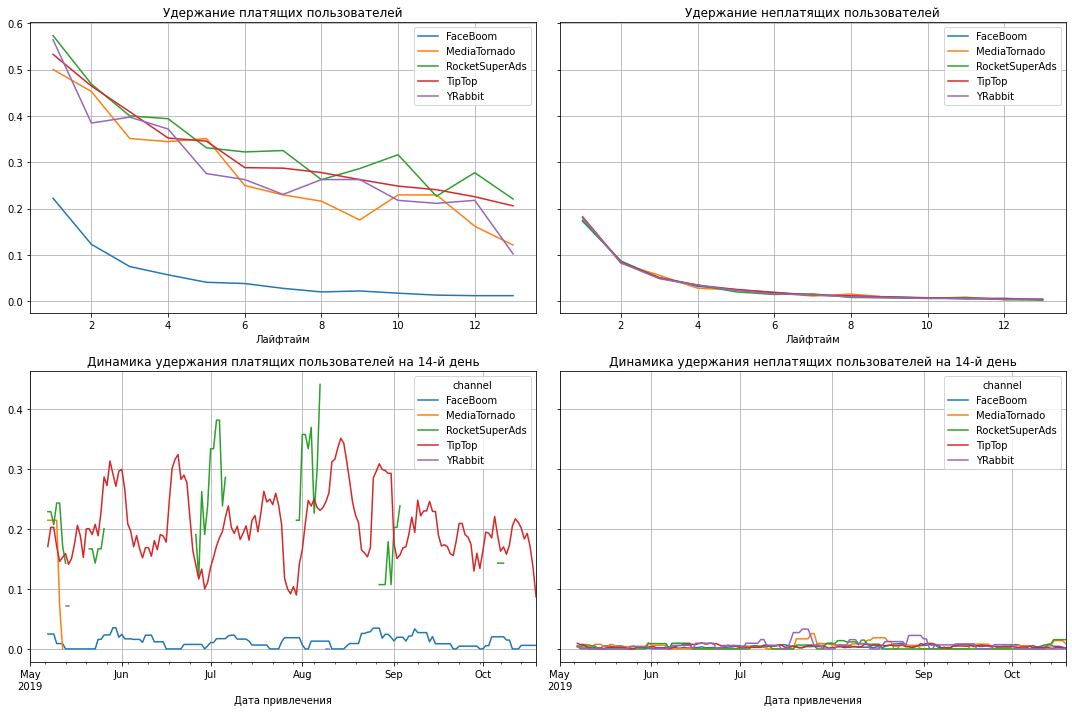

In [54]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(usa_profiles,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon,
                                                                    dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon)

- среди каналов привлечения в США, FaceBoom и MediaTornado показывают худшие результаты по удержанию платящих пользователей,
- RocketSuperAds и YRabbit имеют неплохие показатели удержания.

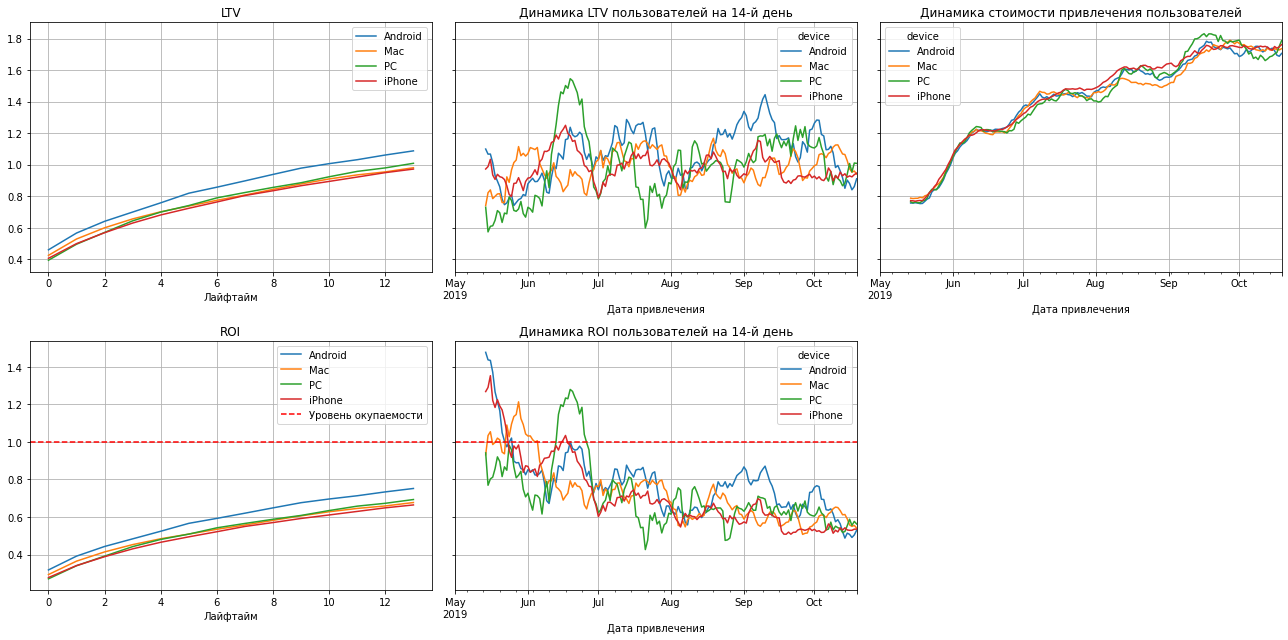

In [55]:
# посмотрим в разрезе устройств
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(usa_profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

- Наибольший LTV в США у устройств на базе ОС Android. 
- Динамика стоимости привлечения пользователей была практически одинаковой для всех устройств. 
- Ни одно устройство не окупилось.

#### Рассмотрим отдельно пользователей в Европе

Посмотрим на графики в разрезе рекламных каналов и устройств пользователей.

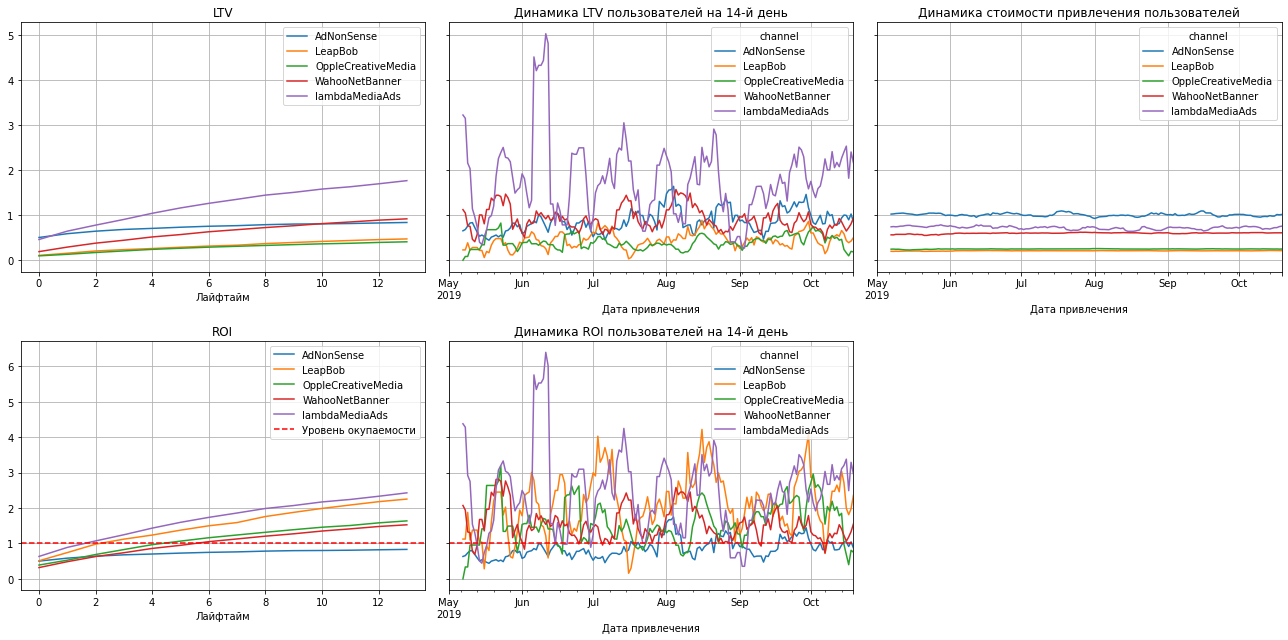

In [56]:
#создадим срез для Европы
# построим графики для европейских пользователей
eu_profiles = profiles.query('region != "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(eu_profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon)

Здесь картина другая - динамика стоимости привлечения пользователей стабильна. В Европе ситуация с окупаемостью рекламы получше чем в США - все каналы, кроме AdNonSense окупились. При планировании дальнейшей кампании стоит обратить внимание на такие каналы как: lambdaMediaAds и LeapBob.

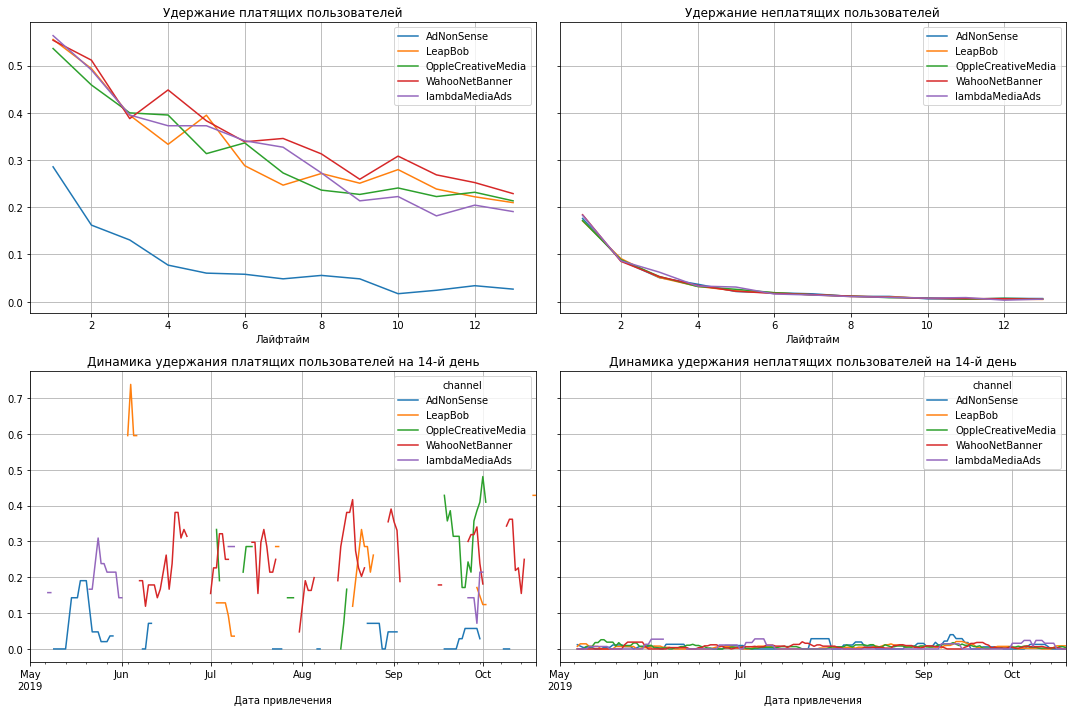

In [57]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(eu_profiles,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon,
                                                                    dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon)

Худший по удержанию среди европейских рекламных источников - канал AdNonSense. Остальные каналы показывают примерно одинаковые результаты.

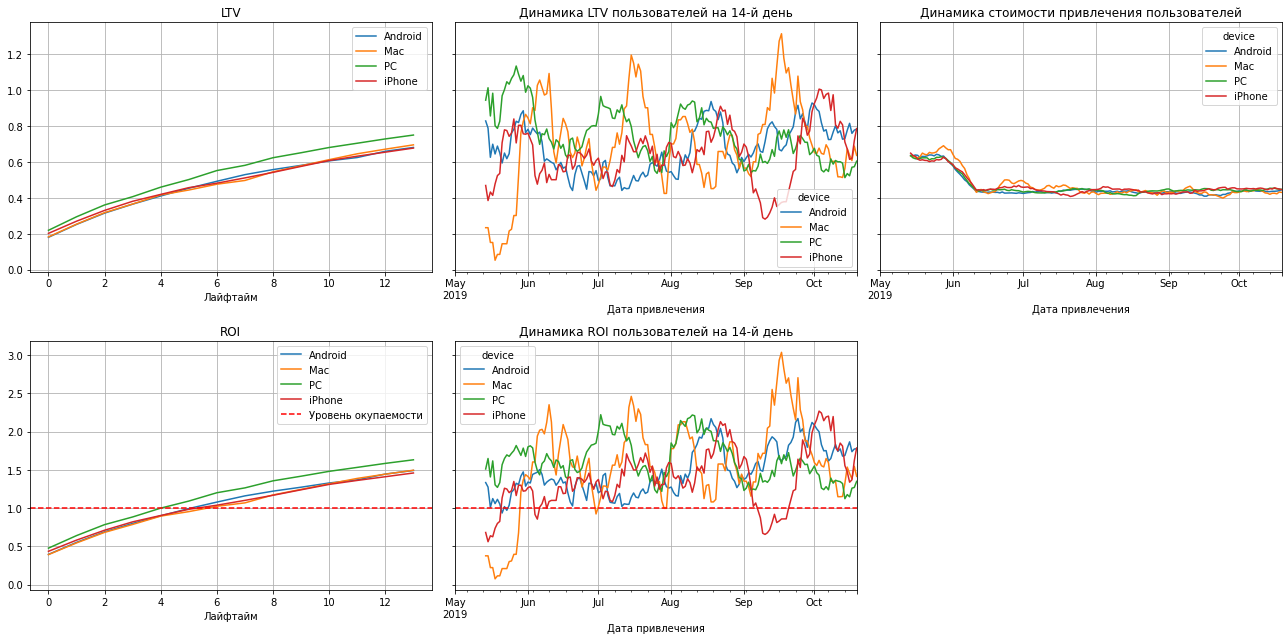

In [58]:
# посмотрим в разрезе устройств
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(eu_profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon, 
                                                                      dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Среди европейских пользователей все устройства окупаются, а лидирующую позицию занимают пользователи PC.

**Общий вывод по разделу:**

Анализируя рентабельность рекламных кампаний, можно прийти к следующим заключениям:

1. Из анализа представленных графиков следует, что со временем рентабельность рекламных инвестиций снижается, в то время как затраты на привлечение клиентов возрастают. `В течение рассматриваемого периода реклама не окупилась`.

2. Среди исследуемых стран, США выделяется как страна с отрицательным ROI, где даже увеличение рекламных бюджетов не привело к улучшению ситуации.

3. По результатам анализа, разделенного по типам устройств, можно отметить, что к 14-му дню наблюдается падение окупаемости рекламы у всех категорий устройств к концу второй недели. Среди устройств наименее эффективными в плане конверсии являются PC, однако пользователи этих устройств демонстрируют хорошие показатели удержания.

4. Особенно проблематичным является канал FaceBoom, который не оправдывает вложений, занимая второе место по объему рекламных расходов и показывая низкий уровень удержания клиентов; также стоит выделить TipTop с его неоправданно быстрым ростом стоимости привлечения клиента (САС), что привело к потере окупаемости через месяц. Канал TipTop показал чрезмерные затраты без достижения положительного ROI, что указывает на неэффективность инвестиций в этот рекламный канал.

В целом реклама не приносит ожидаемой прибыли - это связано, в том числе, с тем, что в США, являющихся ключевым рынком, реклама показывает низкую эффективность.

## Общий вывод

Развлекательное приложение Procrastinate Pro+ представлено на рынках Европы (включая Германию, Францию и Великобританию) и США. Несмотря на значительные инвестиции в маркетинг, за последние месяцы она испытывает финансовые трудности.

Анализ данных о пользователях, привлеченных с 1 мая по 27 октября 2019 года включал:

- Логи сервера с информацией о визитах,
- Данные о покупках за указанный период,
- Затраты на рекламу.

Все датасеты обработаны:
- названия столбцов приведены к единому стилю;
- изменен тип данных, где необходимо;
- пропуски и дубликаты не обнаружены.

**Из основных наблюдений:**
- LTV оставался стабильным на протяжении всего исследуемого периода.
- Затраты на привлечение клиентов (CAC) увеличились, что привело к снижению ROI ниже 100% к августу.
- Большинство пользователей приходят из США, остальные распределены равномерно по другим регионам.
- В США наблюдается более высокая доля платящих пользователей.
- iPhone пользуется популярностью среди пользователей.
- Платящие пользователи равномерно распределены по различным устройствам.
- Большинство пользователей находят приложение самостоятельно, без использования рекламных ссылок.

Анализ показал, что основной причиной финансовых трудностей являются затраты на рекламу через FaceBoom, TipTop в США и AdNonSence в Европе - три канала с самой высокой стоимостью привлечения клиентов (CAC):

- Эти каналы имеют высокую стоимость привлечения, которая не окупается в течение первых двух недель.
- Платящие пользователи с FaceBoom и AdNonSence демонстрируют низкую лояльность.
- Затраты на рекламу через TipTop увеличились в три раза за последние полгода.

**На основе анализа предлагаем следующие шаги для маркетингового отдела:**

- Учитывая большое количество пользователей из США, следует пересмотреть стратегию работы с рекламными платформами:
  - Рассмотреть возможность отказа от использования FaceBoom и перераспределения бюджета на другие каналы.
  - Проанализировать причины увеличения CAC на TipTop и, если возможно, устранить их. В противном случае, стоит рассмотреть отказ от этой платформы в пользу других.
  - Обратить внимание на RocketSuperAds, канал с высокой конверсией и относительно низкой стоимостью привлечения клиентов. 

- На европейском рынке: 
    - Проработать стратегию с LamdaMediaAds, каналом с высокой конверсией и самой высокой окупаемостью рекламы в Европе.
    - Отказаться от сотрудничества с AdNonSense, поскольку этот канал оказался убыточным.
    
- Среди устройств PC показывают наименьшую конверсию, но пользователи этих устройств имеют хорошие показатели удержания. Возможно, стоит пересмотреть рекламную стратегию на этих устройствах.

- Работа с органическими пользователями может быть ключевым фактором доходности приложения. 
